**Full Name:Ali-abdollahi**

**Student ID:404443120**

# Deep Learning Assignment: Fashion-MNIST Classification with MLP
---

## Objective

In this assignment, you will implement a Multi-Layer Perceptron (MLP) from scratch to classify images from the Fashion-MNIST dataset. You will also implement the Cross-Entropy loss function and visualize the learned representations using a dimensionality reduction technique called _t-SNE_.


## Dataset

Fashion-MNIST consists of 70,000 grayscale images (60,000 training + 10,000 test) of 28x28 pixels across 10 fashion categories:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

**Part 1: Setup and Data Loading**

Import the necessary libraries and load the Fashion-MNIST dataset.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)

# Load Fashion-MNIST dataset
data = np.load("/kaggle/input/fashion-mnist/fashion_mnist.npz")

X_train = data["X_train"]
y_train = data["y_train"]
X_test = data["X_test"]
y_test = data["y_test"]

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images from 28x28 to 784-dimensional vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Print dataset information
print(f"Training set shape: {X_train_flat.shape}")
print(f"Test set shape: {X_test_flat.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Training set shape: (60000, 784)
Test set shape: (10000, 784)
Number of classes: 10


**Part 2: Data Visualization**

Visualize some sample images from the dataset to understand what we're working with.

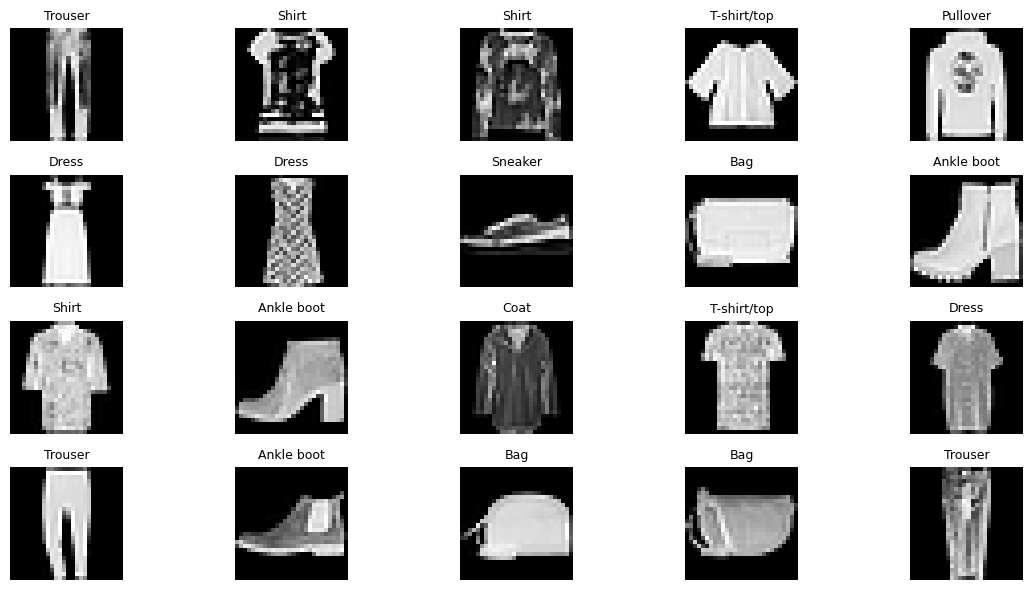

In [3]:
# Visualize random samples from the dataset
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    idx = np.random.randint(0, len(X_train))
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]], fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()

**Part 3: Implement Activation Functions**

Implement the ReLU activation function and its derivative, as well as the Softmax function.


**TODO:** Complete the implementation of the activation functions below.

In [5]:
def relu(x):
    """
    ReLU activation function
    Args:
        x: Input array
    Returns:
        Output after applying ReLU
    """
    
##  Sudo code ##   
###########################################
    # this is sudo code we see here is not a good idea! why? we can use numpy to have really fast operations in C. 
    #list_of_inputs = []
   # for i in list_of_inputs:
     #   if i>= 0 :
     #       i = i 
      #  else:
      #      i = 0 
###############################################
# relu function only represents numbers in positive values, this behavior we need it in relu_derivative
# TODO: Implement ReLU activation
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function
    Args:
        x: Input array
    Returns:
        Derivative of ReLU
    """
   ################
    # sudo code ; 
    #for i in x[i]:
    #    if i > 1 :
    #       i = 1
    #   else :
    #        i = 0
    #################

    # TODO: Implement ReLU derivative    
    return (x > 0).astype(float)

def softmax(x):
    """
    Softmax activation function
    Args:
        x: Input array of shape (batch_size, num_classes)
    Returns:
        Softmax probabilities
    """
    #why this code not good enough? this code make a wrong sumation between all classes and and all pictures and also made wrong probablity
   # e_x = np.exp(x - np.max(x))
    #return e_x / e_x.sum(axis=0)
    
    x_max = np.max(x, axis=1, keepdims=True)
    e_x = np.exp(x - x_max)
    sum_e_x = np.sum(e_x, axis=1, keepdims=True)
    return e_x / sum_e_x

    

In [23]:
batch_input = np.array([
    [10.0,  1.0,  0.5,  0.1], 
    [ 2.0,  2.0,  0.1,  0.0],
    [-1.0, -5.0, -0.5, -2.0]
])
output_probs = softmax(batch_input)
print(output_probs)

row_sums = np.sum(output_probs, axis=1)
print(row_sums)

[[9.99751625e-01 1.23379152e-04 7.48332386e-05 5.01622199e-05]
 [4.37655167e-01 4.37655167e-01 6.54594791e-02 5.92301860e-02]
 [3.29498373e-01 6.03497322e-03 5.43250976e-01 1.21215677e-01]]
[1. 1. 1.]


**Part 4: Implement Cross-Entropy Loss**

Implement the Cross-Entropy loss function for multi-class classification.


**TODO:** Complete the Cross-Entropy loss implementation.

In [1]:
## This was cross-entropy I found from the internet, and it does not work for our problem.
# why ? The input format is not the same as what is asked.

def cross_entropy(y_pred, y_true):

    # computing softmax values for predicted values
    y_pred = softmax(y_pred)
    loss = 0
    
    # Doing cross entropy Loss
    for i in range(len(y_pred)):

        # Here, the loss is computed using the
        # above mathematical formulation.
        loss = loss + (-1 * y_true[i]*np.log(y_pred[i]))

    return pass

In [6]:
# for i in c :
# p(xi)*lg(predicted(xi))  ---> add it to Loss= 0 



def cross_entropy_loss(y_true, y_pred):
    """
    Cross-entropy loss function
    Args:
        y_true: True labels (integers) of shape (batch_size,)
        y_pred: Predicted probabilities of shape (batch_size, num_classes)
    Returns:
        Average cross-entropy loss
    """
    # TODO: Implement cross-entropy loss
    # How many batches do we have?
    m = y_true.shape[0] 
    # count number of classes
    num_classes = y_pred.shape[1]
    # build a lot of zeros
    y_true_one_hot = np.zeros((m, num_classes))
    # 1 in the correct area
    for i in range(m):
        correct_class_inx = y_true[i]
        y_true_one_hot[i, correct_class_inx] = 1.0  ## how does it work ? Find the correct row and column = 1  

    # tiny sumation avoiding lg0
    y_pred_safe = y_pred + 1e-9
    # p(xi)*lg(predicted(xi))
    loss_matrix = y_true_one_hot * np.log(y_pred_safe)
    # summation of all errors
    total_loss = - np.sum(loss_matrix)
    
    avg_loss = total_loss / m

    return avg_loss

In [8]:
# y_true: 
y_true_test = np.array([1, 0, 2])

# y_pred:
y_pred_test = np.array([
    [0.1, 0.8, 0.1, 0.0],   
    [0.9, 0.1, 0.0, 0.0],   
    [0.3, 0.4, 0.3, 0.0]   
])

loss = cross_entropy_loss(y_true_test, y_pred_test)
print("your loss:")
print(loss)

your loss:
0.5108256218678425


**Part 5: Implement Multi-Layer Perceptron (MLP)**

Implement a Multi-Layer Perceptron class with forward and backward propagation.


Architecture:

- Input layer: 784 neurons (28x28 flattened)

- Hidden layer 1: 128 neurons with ReLU activation

- Hidden layer 2: 64 neurons with ReLU activation

- Output layer: 10 neurons with Softmax activation


**TODO:** Complete the MLP implementation below.

In [12]:
class MLP:
    def __init__(self, input_size=784, hidden1_size=128, hidden2_size=64, output_size=10):
        """
        Initialize the MLP with random weights and biases
        """
        # TODO: Initialize weights and biases using He initialization

        # Weights
        self.W1 =  np.random.randn(input_size, hidden1_size) * (np.sqrt(2.0 / input_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * (np.sqrt(2.0 / hidden1_size))
        self.W3 = np.random.randn(hidden2_size, output_size) * (np.sqrt(2.0 / hidden2_size))

        # Biases
        self.b1 = np.zeros((1, hidden1_size))
        self.b2 = np.zeros((1, hidden2_size))
        self.b3 = np.zeros((1, output_size))

        # Cache for backpropagation
        self.cache = {}

    def forward(self, X):
        """
        Forward propagation through the network
        Args:
            X: Input data of shape (batch_size, input_size)
        Returns:
            Output probabilities of shape (batch_size, output_size)
        """
        # TODO: Implement forward propagation
        # Store intermediate values in self.cache for backpropagation

        # fromula = Zigma (WX) + b 
        # dot do * !!!!
        z1 = np.dot(X, self.W1)+self.b1
        a1 = relu(z1)
        
        z2 = np.dot(a1, self.W2)+self.b2
        a2 = relu(z2)
        
        z3 = np.dot(a2, self.W3)+self.b3
        a3 = softmax(z3)
        
        self.cache={"X": X,"z1": z1, "a1": a1,"z2": z2, "a2": a2,"z3": z3, "a3": a3}
        
        return a3

    def backward(self, X, y_true, learning_rate=0.01):
        """
        Backward propagation and parameter update
        Args:
            X: Input data of shape (batch_size, input_size)
            y_true: True labels of shape (batch_size,)
            learning_rate: Learning rate for gradient descent
        """
        # TODO: Implement backward propagation
        m = X.shape[0]

        z1 =self.cache['z1']
        a1 =self.cache['a1']
        z2 =self.cache['z2']
        a2 =self.cache['a2']
        a3 = self.cache['a3'] 

        y_one_hot = np.zeros((m, 10))
        y_one_hot[np.arange(m), y_true] = 1

# ----------------------------------------------
        dz3 = a3 - y_one_hot 
        
        dw3 =np.dot(a2.T, dz3) / m
        db3= np.sum(dz3, axis=0, keepdims=True) / m
# ----------------------------------------------
        da2 =np.dot(dz3, self.W3.T)
        
        dz2 =da2 * relu_derivative(z2)

        dw2 =np.dot(a1.T, dz2) / m
        db2= np.sum(dz2, axis=0, keepdims=True) / m

# ----------------------------------------------
        da1= np.dot(dz2, self.W2.T)
        
        dz1= da1 * relu_derivative(z1)

        dw1= np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

# ----------------------------------------------
        self.W1 = self.W1 - learning_rate * dw1
        self.b1 =self.b1 - learning_rate * db1
        
        self.W2 =self.W2 - learning_rate * dw2
        self.b2 =self.b2 - learning_rate * db2
        
        self.W3 = self.W3 - learning_rate * dw3
        self.b3 = self.b3 - learning_rate * db3

    def predict(self, X):
        """
        Make predictions on input data
        Args:
            X: Input data of shape (batch_size, input_size)
        Returns:
            Predicted class labels
        """
        # TODO: Implement prediction
        predictions_prob = self.forward(X)
        y_pred = np.argmax(predictions_prob, axis=1) 
        return y_pred
        

    def get_representations(self, X):
        """
        Get the representations from the second hidden layer for t-SNE visualization
        Args:
            X: Input data of shape (batch_size, input_size)
        Returns:
            Hidden layer representations
        """
        z1 = np.dot(X, self.W1) + self.b1
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = np.maximum(0, z2)
        return a2

**Part 6: Training Loop**

Implement the training loop to train your MLP on the Fashion-MNIST dataset.


**TODO:** Complete the training loop implementation.

In [17]:
def train_mlp(model, X_train, y_train, X_test, y_test,
              epochs=20, batch_size=128, learning_rate=0.01):
    """
    Train the MLP model
    Args:
        model: MLP instance
        X_train, y_train: Training data
        X_test, y_test: Test data
        epochs: Number of training epochs
        batch_size: Batch size for mini-batch gradient descent
        learning_rate: Learning rate
    Returns:
        Dictionary containing training history
    """
    # TODO: Implement the training loop
    # 1. For each epoch:
    #    a. Shuffle training data
    #    b. Split into mini-batches
    #    c. For each batch:
    #       - Forward pass
    #       - Compute loss
    #       - Backward pass (update weights)
    #    d. Compute training and test accuracy
    #    e. Print progress
    # 2. Store and return training history (losses and accuracies)

    history = {
        'train_loss': [],
        'train_acc': [],
        'test_acc': []
    }
    # How many records do we have? 
    n_samples = X_train.shape[0]
    for epoch in range(epochs):
        
        
        # shuffleing data helps us to came with same output when 
        indices = np.arange(n_samples)
        #shuffle
        np.random.shuffle(indices)
        
        # rearrange data 
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]

        epoch_total_loss = 0
        num_batches = 0

        # working based on batch sizes 
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]
            
            # Forward pass 
            probs = model.forward(X_batch)
            
            # Compute loss: 
           
            loss = cross_entropy_loss(y_batch, probs)
            epoch_total_loss += loss
            num_batches += 1
            
            # Backward pass: 
            model.backward(X_batch, y_batch, learning_rate)

        
        # calculate acc
        # avg of loss in this level 
        avg_loss = epoch_total_loss / num_batches
        
        
        y_train_pred = model.predict(X_train)
        train_accuracy = np.mean(y_train_pred == y_train)
        
        y_test_pred = model.predict(X_test)
        test_accuracy = np.mean(y_test_pred == y_test)

        history['train_loss'].append(avg_loss)
        history['train_acc'].append(train_accuracy)
        history['test_acc'].append(test_accuracy)

        # اhow does it progress the work 
        print("Epoch")
        print(epoch+1/epochs)
        print("loss")
        print(avg_loss)
        print("train acc:")
        print(train_accuracy)
        print("test acc")
        print(test_accuracy)
        

    return history

**Part 7: Initialize and Train the Model**

Create an instance of your MLP and train it on the Fashion-MNIST dataset.

In [18]:
# Initialize the model
mlp = MLP(input_size=784, hidden1_size=128, hidden2_size=64, output_size=10)

# Train the model
history = train_mlp(
    mlp,
    X_train_flat, y_train,
    X_test_flat, y_test,
    epochs=20,
    batch_size=128,
    learning_rate=0.01
)

Epoch
0.05
loss
0.9868988748297018
train acc:
0.7713833333333333
test acc
0.7586
Epoch
1.05
loss
0.610460705337015
train acc:
0.81555
test acc
0.8043
Epoch
2.05
loss
0.5391804315802278
train acc:
0.8275333333333333
test acc
0.8167
Epoch
3.05
loss
0.5024078325607592
train acc:
0.83675
test acc
0.8248
Epoch
4.05
loss
0.4780232829063749
train acc:
0.8403833333333334
test acc
0.8281
Epoch
5.05
loss
0.46005100557773804
train acc:
0.8398333333333333
test acc
0.8261
Epoch
6.05
loss
0.4470962998633089
train acc:
0.8520666666666666
test acc
0.8389
Epoch
7.05
loss
0.43580980067268776
train acc:
0.8554666666666667
test acc
0.8416
Epoch
8.05
loss
0.4259287175160956
train acc:
0.8519666666666666
test acc
0.8373
Epoch
9.05
loss
0.4176183250562601
train acc:
0.8556666666666667
test acc
0.8428
Epoch
10.05
loss
0.4110096755371444
train acc:
0.8601666666666666
test acc
0.8466
Epoch
11.05
loss
0.4046493044260406
train acc:
0.8569333333333333
test acc
0.8441
Epoch
12.05
loss
0.39983041872325703
train acc:

**Part 8: Plot Training History**

Visualize the training progress by plotting loss and accuracy curves.

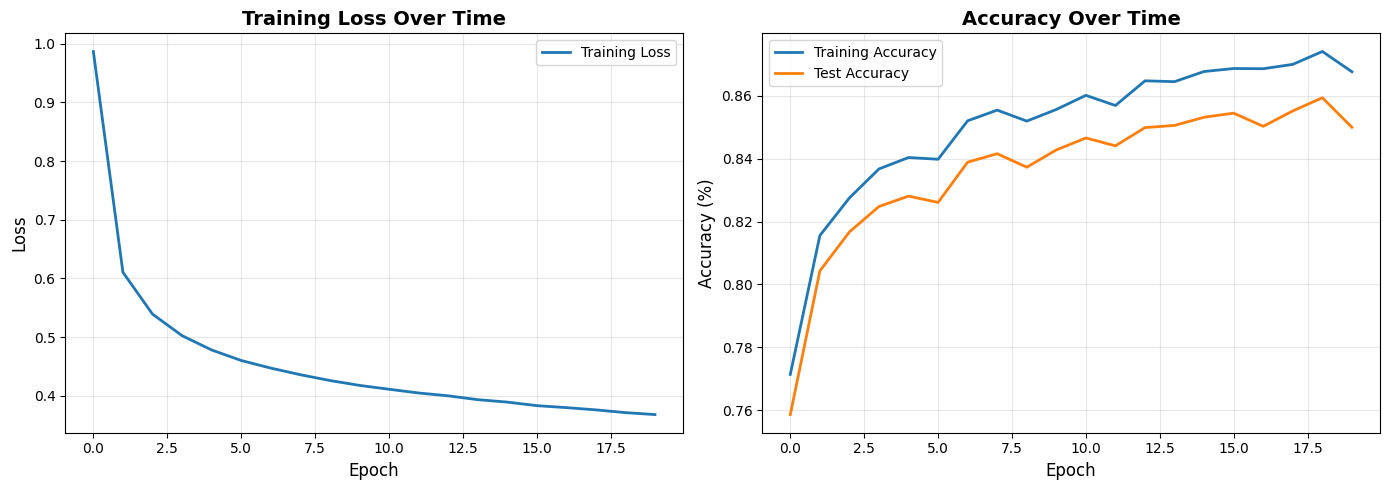


Final Training Accuracy: 0.87%
Final Test Accuracy: 0.85%


In [19]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(history['train_loss'], label='Training Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history['train_acc'], label='Training Accuracy', linewidth=2)
axes[1].plot(history['test_acc'], label='Test Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Accuracy Over Time', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final results
print(f"\nFinal Training Accuracy: {history['train_acc'][-1]:.2f}%")
print(f"Final Test Accuracy: {history['test_acc'][-1]:.2f}%")

**Part 9: Evaluate Model Performance**

Generate a confusion matrix and classification report to analyze model performance.

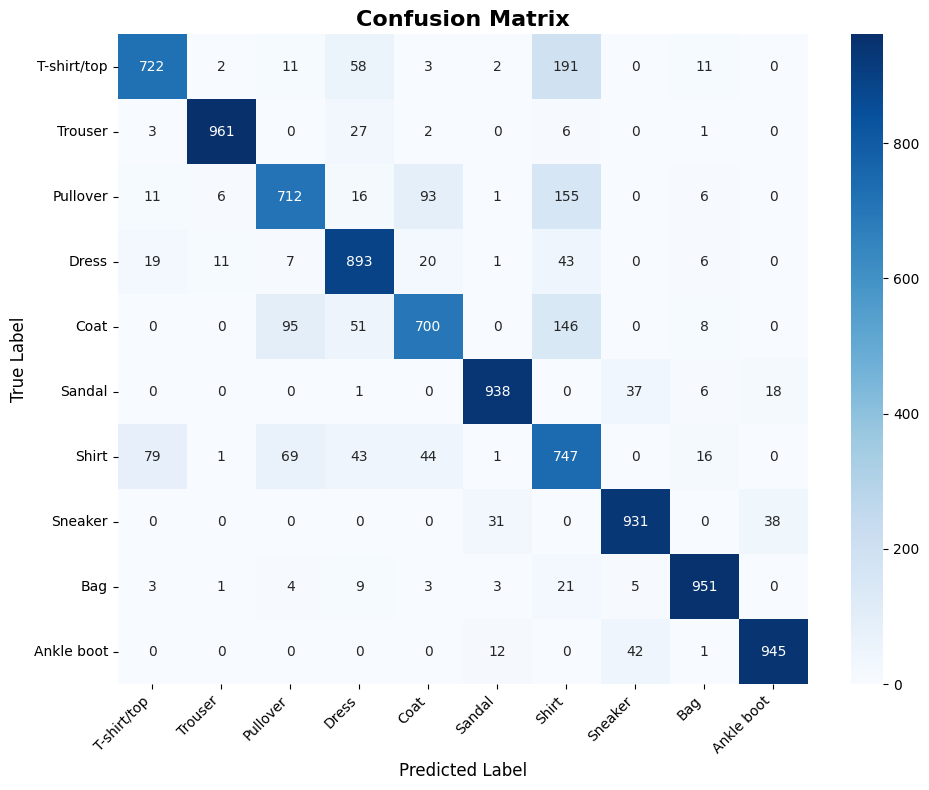


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.72      0.79      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.79      0.71      0.75      1000
       Dress       0.81      0.89      0.85      1000
        Coat       0.81      0.70      0.75      1000
      Sandal       0.95      0.94      0.94      1000
       Shirt       0.57      0.75      0.65      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on test set
y_pred = mlp.predict(X_test_flat)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=class_names))

**Part 10: t-SNE Visualization**

Use t-SNE to visualize the learned representations from the second hidden layer.


**t-SNE (t-Distributed Stochastic Neighbor Embedding)** is a dimensionality reduction technique that helps visualize high-dimensional data in 2D or 3D space while preserving local structure.


**TODO:** Complete the t-SNE visualization.

In [ ]:
# Get representations from the second hidden layer
# Use a subset of test data for faster computation
n_samples = 5000
indices = np.random.choice(len(X_test_flat), n_samples, replace=False)
X_subset = X_test_flat[indices]
y_subset = y_test[indices]

# TODO: Get hidden layer representations using model.get_representations()
representations = None  # Your code here

# TODO: Apply t-SNE to reduce dimensionality to 2D
# Hint: Use TSNE from sklearn.manifold with n_components=2
tsne = None  # Your code here
X_tsne = None  # Your code here

# Visualize t-SNE results
plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                     c=y_subset, cmap='tab10',
                     alpha=0.6, s=20)
plt.colorbar(scatter, ticks=range(10), label='Class')
plt.clim(-0.5, 9.5)

# Add legend with class names
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=plt.cm.tab10(i/9), label=class_names[i])
                   for i in range(10)]
plt.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.15, 1), fontsize=10)

plt.title('t-SNE Visualization of Hidden Layer Representations',
         fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nt-SNE visualization complete!")
print("Observe how similar fashion items cluster together in the 2D space.")

**Part 11: Analyze Results and Reflections**

Questions to answer (TODO):


1. **Model Performance**:

    - What test accuracy did your model achieve?

    - Which classes are most frequently confused with each other?

    - Why do you think certain classes might be more difficult to classify?


2. **t-SNE Visualization**:

    - Do similar fashion items cluster together? Provide an example from the t-SNE plot.

    - Are there any surprising patterns in the visualization? If so, provide an example from the t-SNE plot.